In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 679 kB 5.3 MB/s 


In [ ]:
import tensorflow_addons as tfa
from tensorflow_addons.layers import InstanceNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
from random import sample
import numpy as np
import random
import cv2
import os

###load models & test data

In [ ]:
unet128 = tf.keras.models.load_model('drive/MyDrive/vis-th_pix2pix128/g_model_076500.h5', compile=False)

In [ ]:
resunet6 = tf.keras.models.load_model('drive/MyDrive/vis-th_pix2pix6/g_model_076500.h5', compile=False)

In [ ]:
unet256 = tf.keras.models.load_model('drive/MyDrive/vis-th_pix2pix256/g_model_076500.h5', compile=False)

In [ ]:
resunet9 = tf.keras.models.load_model('drive/MyDrive/vis-th_pix2pix9/g_model_076500.h5', compile=False)

In [ ]:
cycle6 = tf.keras.models.load_model('drive/MyDrive/CycleGAN6/g_cycleGAN6.h5', custom_objects={'InstanceNormalization': InstanceNormalization})

In [ ]:
data128 = np.load('drive/MyDrive/Summer_internships/Transfert/Datasets/Compressed/test_128.npz')

In [ ]:
data256 = np.load('drive/MyDrive/Summer_internships/Transfert/Datasets/Compressed/test_256.npz')

In [ ]:
th128 = data128['arr_0']
vis128 = data128['arr_1']

In [ ]:
th256 = data256['arr_0']
vis256 = data256['arr_1']

In [ ]:
len(th128)

100

###select 5 random images 

In [ ]:
source128 = []
target128 = []

source256 = []
target256 = []

In [ ]:
pool = sample(range(99), 5)

for i in pool:
  source128.append(th128[i])
  target128.append(vis128[i])

  source256.append(th256[i])
  target256.append(vis256[i])

###predict selected images

In [ ]:
unet128_pred = []
resunet6_pred = []

unet256_pred = []
resunet9_pred = []

cycle6_pred = []

In [ ]:
for i in range(len(source128)):
  im128 = (source128[i] - 127.5) / 127.5
  im128 = np.expand_dims(im128, 0)
  unet128_pred.append(unet128.predict(im128))
  resunet6_pred.append(resunet6.predict(im128))
  cycle6_pred.append(cycle6.predict(im128))

  im256 = (source256[i] - 127.5) / 127.5
  im256 = np.expand_dims(im256, 0)
  unet256_pred.append(unet256.predict(im256))
  resunet9_pred.append(resunet9.predict(im256))

### normalize predicted images

In [ ]:
unet128_pred = [ (i[0] + 1) / 2.0 for i in unet128_pred ]
resunet6_pred = [ (i[0] + 1) / 2.0 for i in resunet6_pred ]
cycle6_pred = [ (i[0] + 1) / 2.0 for i in cycle6_pred ]

unet256_pred = [ (i[0] + 1) / 2.0 for i in unet256_pred ]
resunet9_pred = [ (i[0] + 1) / 2.0 for i in resunet9_pred ]

###plot results

In [ ]:
def plot_fig_pix2pix(thermal, unet, resunet, ground_truth):
  f, axarr = plt.subplots(5,4)
  f.set_figheight(10)
  f.set_figwidth(10)

  axarr[0,0].set_title("Thermal")
  axarr[0,1].set_title("Unet")
  axarr[0,2].set_title("ResUnet")
  axarr[0,3].set_title("Visible")

  for i in range(len(thermal)):
    axarr[i,0].axis('off')
    axarr[i,0].imshow(thermal[i].astype('uint8'))
  
  for i in range(len(thermal)):
    axarr[i,1].axis('off')
    axarr[i,1].imshow(unet[i])

  for i in range(len(thermal)):
    axarr[i,2].axis('off')
    axarr[i,2].imshow(resunet[i])

  for i in range(len(thermal)):
    axarr[i,3].axis('off')
    axarr[i,3].imshow(ground_truth[i].astype('uint8'))

  #plt.savefig('fig_path.png')

In [ ]:
def fig_p2p_vs_cycle(thermal, unet, resunet, cycle, ground_truth):
  f, axarr = plt.subplots(5,5)
  f.set_figheight(10)
  f.set_figwidth(10)

  axarr[0,0].set_title("Thermal")
  axarr[0,1].set_title("p2p_Unet128")
  axarr[0,2].set_title("p2p_ResUnet6")
  axarr[0,3].set_title("Cycle_RseUnet6")
  axarr[0,4].set_title("Visible")
  
  for i in range(len(thermal)):
    axarr[i,0].axis('off')
    axarr[i,0].imshow(thermal[i].astype('uint8'))
  
  for i in range(len(thermal)):
    axarr[i,1].axis('off')
    axarr[i,1].imshow(unet[i])

  for i in range(len(thermal)):
    axarr[i,2].axis('off')
    axarr[i,2].imshow(resunet[i])

  for i in range(len(thermal)):
    axarr[i,3].axis('off')
    axarr[i,3].imshow(cycle[i])

  for i in range(len(thermal)):
    axarr[i,4].axis('off')
    axarr[i,4].imshow(ground_truth[i].astype('uint8'))

  #plt.savefig('fig_path.png')

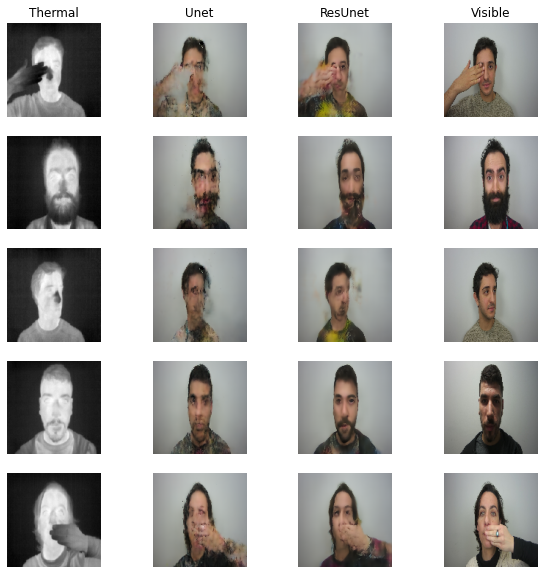

In [ ]:
#All lists have the same length=5
plot_fig_pix2pix(source128, unet128_pred, resunet6_pred, target128)

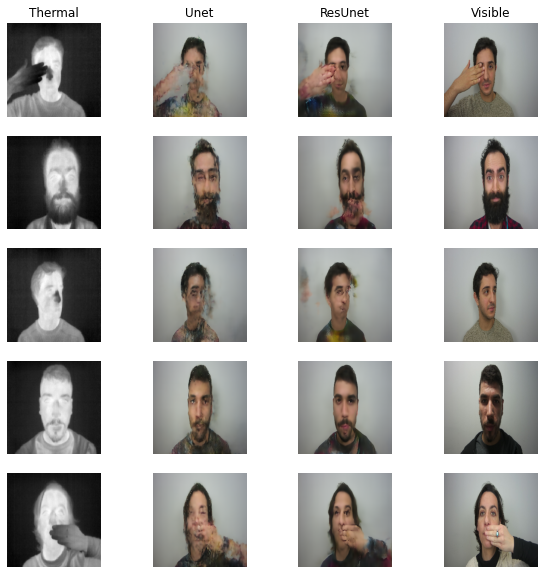

In [ ]:
plot_fig_pix2pix(source256, unet256_pred, resunet9_pred, target256)

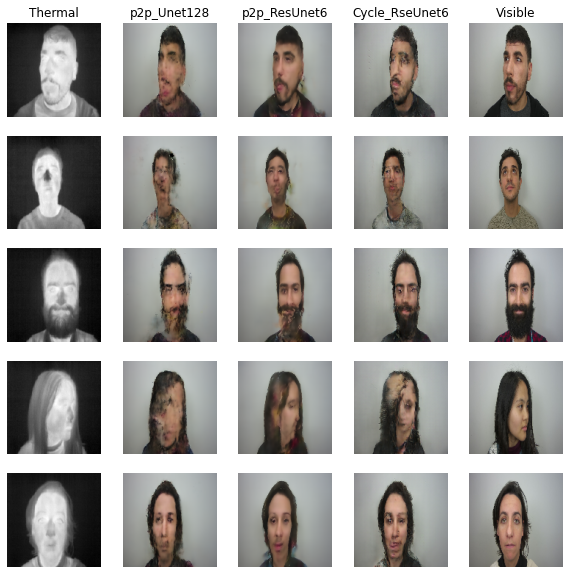

In [ ]:
fig_p2p_vs_cycle(source128, unet128_pred, resunet6_pred, cycle6_pred, target128)